**Autor**: *Julián David León Quintero*  

<style>
  .centered {
    text-align: center;
  }
</style>

# <div class="centered">**Simulation of the atmospheric attenuation**</div>

## ***Importación de Librerías***

In [ ]:
import py4cats
from py4cats import dod2ri, riPlot,lbl2xs,lbl2ac, lbl2od, atmRead, atmPlot, higstract

## ***Lectura de los datos***

In [ ]:
# Definir el rango espectral (con padding manual)
wn_min = 2000.0 - 20  # 1980 cm⁻¹
wn_max = 3000.0 + 20  # 3020 cm⁻¹

# Pasa los límites como una tupla
lines_main = higstract(
    '680HIT86b.par',  # ruta a tu archivo .par
    (wn_min, wn_max)  # tupla con el límite inferior y superior
)

print(lines_main)

 WARNING --- hitran.bisect_first_line:   requested spectral range  1980.000000 --- 3020.000000     only partly in database  2000.000900 --- 2999.999700
# first line in spectral range at record number 1 found in 49376.981972932 sec
 b' 31 2000.001500 9.862E-26 1.522E+00.06790.086 2499.17140.760.000000'
# last  line     accepted 
 b' 31 2999.999700 3.329E-25 5.162E-02.06580.073 1323.00850.76-.008000'

 370725 lines of  6  molecule(s) extracted from  680HIT86b.par
 returning a dictionary of lineArray's for  O3 CO CH4 CO2 H2O N2O
{'O3': lineArray([(2000.0015, 9.862e-26, 2499.1714, 0.0679, 0.76, 0.086, 1.,  0.   ),
           (2000.0019, 1.572e-25, 1128.2656, 0.0863, 0.76, 0.105, 1.,  0.   ),
           (2000.0076, 1.471e-24, 1963.3028, 0.0709, 0.8 , 0.08 , 1.,  0.   ),
           ...,
           (2999.9909, 2.859e-24, 1183.7848, 0.0658, 0.74, 0.081, 1., -0.008),
           (2999.9988, 5.098e-24, 1154.0233, 0.0643, 0.72, 0.083, 1., -0.008),
           (2999.9997, 3.329e-25, 1323.0085, 0.065

## ***Atmosferic Reading***

In [38]:
mls = atmRead('data_and_doc/data/atmos/20/mls.xy', zToA=100)
dll = lines_main

 Atmos1d: got p, T, air   and 8 molecules on 20 levels
 WARNING --- atmTruncate:  zToA very small, assuming kilometer units


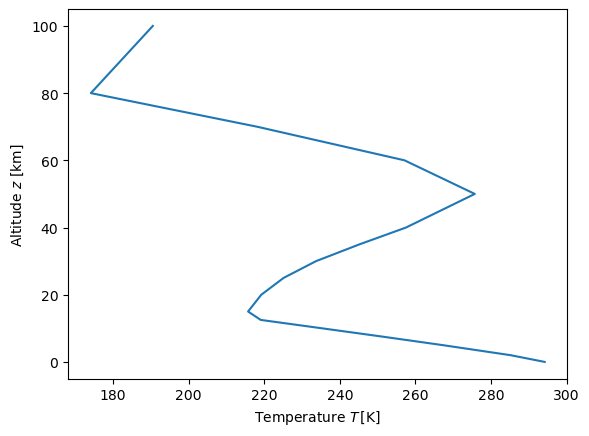

In [39]:
atmPlot(mls)

## ***Atlas By Lines***

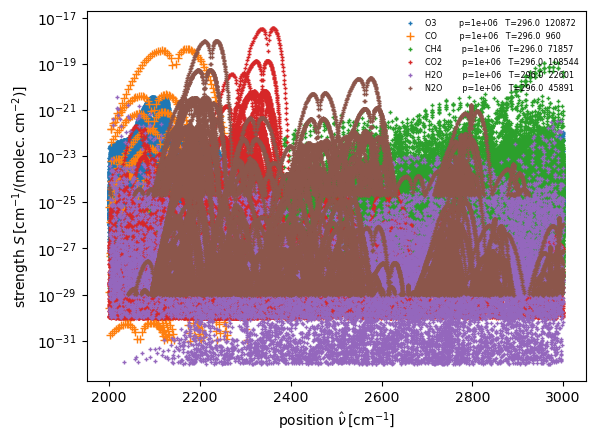

In [8]:
from py4cats import atlas
atlas(dll)

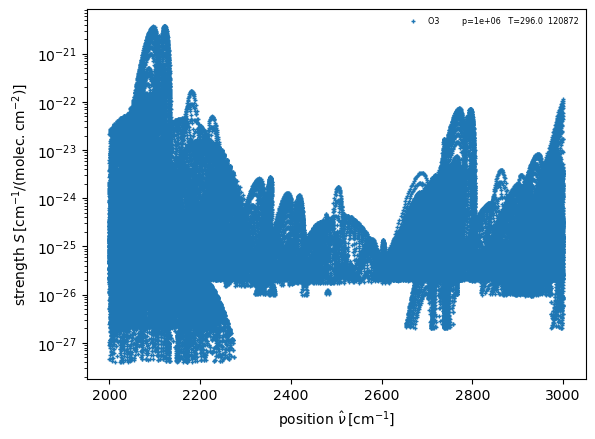

In [9]:
atlas(dll['O3'])

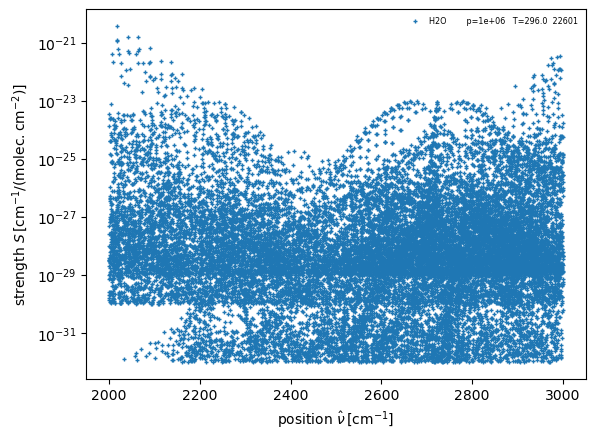

In [10]:
atlas(dll['H2O'])

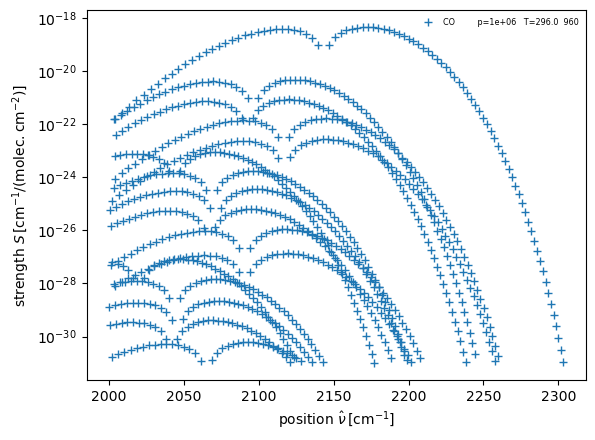

In [11]:
atlas(dll['CO'])

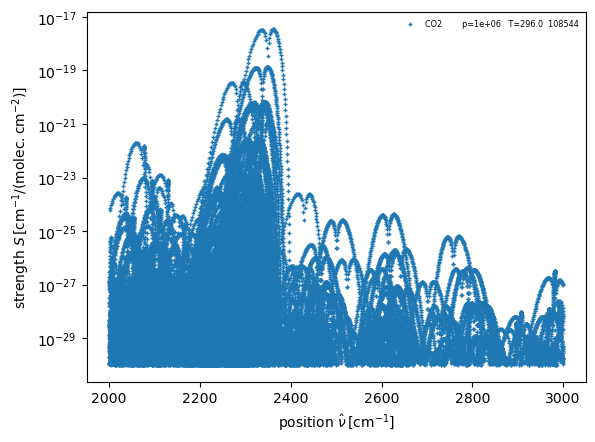

In [12]:
atlas(dll['CO2'])

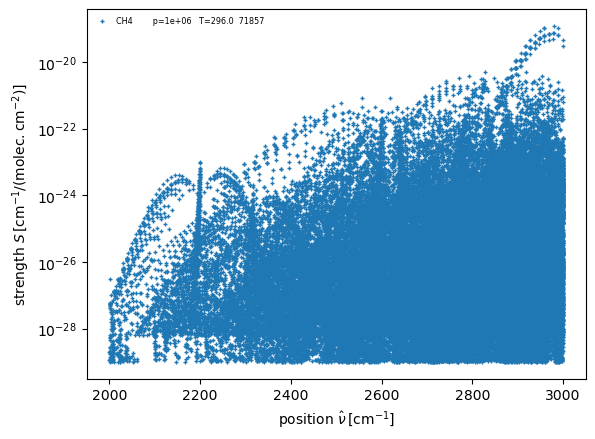

In [13]:
atlas(dll['CH4'])

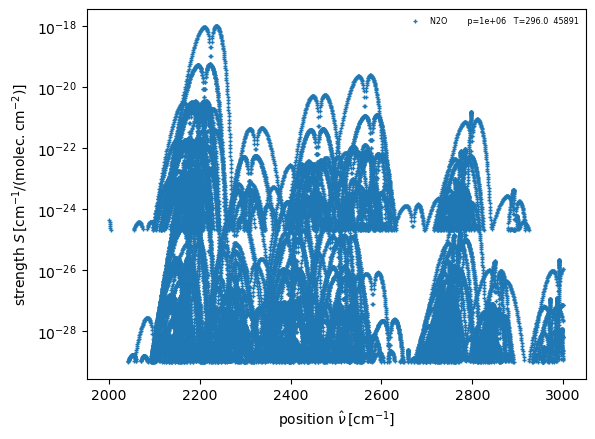

In [14]:
atlas(dll['N2O'])

In [15]:
# Supongamos que mls tiene las claves 'T' y 'P'

print(mls['T'])
print(mls['p'])

[294.2  289.7  285.2  279.2  273.2  267.2  251.45 235.3  219.05 215.7
 219.2  225.1  233.7  245.2  257.5  275.7  257.1  218.1  174.1  190.5 ]
[1.013e+06 9.020e+05 8.020e+05 7.100e+05 6.280e+05 5.540e+05 3.981e+05
 2.810e+05 1.934e+05 1.300e+05 5.950e+04 2.770e+04 1.320e+04 6.520e+03
 3.330e+03 9.510e+02 2.720e+02 6.700e+01 1.200e+01 2.580e-01]


## ***Cross Section***

 lbl2xs:  O3        48.00amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000001 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.001500 <=  v <=  2999.999692
 strength               4e-28 <=  S <=     3.75e-21
 Lorentz width              0 <=  L <=     9.26e-05
 Gauss width          0.00178 <=  D <=      0.00267
 cross section  O3       120872 lines   1.01325mb  296.0K  12.5 
 wavenumber grid:      9472+1 points:  2100.000000 2100.000211 2100.000422  ...  2101.999789 2102.000000   (delta  0.000211149) 64
       9473     2.06sec     1.80ns:  3.08485e-23 < xs < 1.39269e-18
 lbl2xs:  CO        28.01amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000003 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 positio

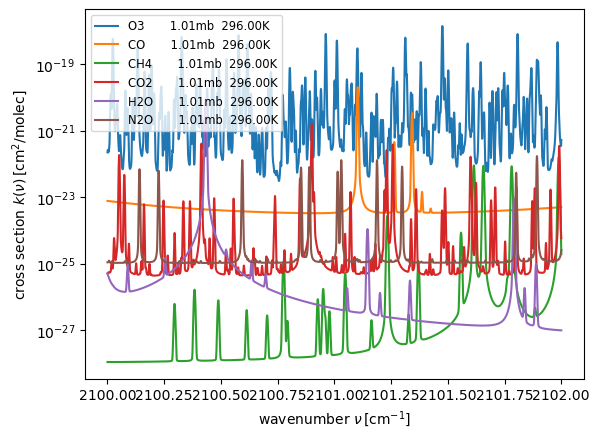

In [11]:
from py4cats import lbl2xs, xsPlot
# Calcular la sección cruzada usando lbl2xs con el espectro (dll) y el perfil (mls)
pressure_fixed = 1013.25  # en mb
temperature_fixed = 296.0   # en K

# Parámetros espectrales para lbl2xs
line_shape = "Voigt"     # Perfil de línea deseado
sampling = 10.0           # Tasa de muestreo
n_grids = 3              # Número de grids
grid_ratio = 8           # Relación entre grids
n_widths = 25.0          # Límites del grid fino
lagrange = 2             # Interpolación de Lagrange
verbose = True           # Salida detallada


vLimits = (2100.0, 2102.0)

# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll,  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

 lbl2xs:  CH4       16.04amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000005 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.055400 <=  v <=  2999.998052
 strength               1e-29 <=  S <=     1.21e-19
 Lorentz width        1.9e-06 <=  L <=     8.15e-05
 Gauss width          0.00308 <=  D <=      0.00461
 cross section  CH4      71857 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [2100,3000] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 2145849 0.00041941460904966244   w 268232 0.0033553168723972995
 v:    2145848  2100.000000 2100.000419 2100.000839 2100.001258 2100.001678  ...  2999.998322 2999.998742 2999.999161 2999.999581 3000.000000
 w:     268231  2100.000000 2100.003355 2100.006711 2100.010066 2100.013421  ...  2999.986579 2999.989934 2999.993289 2999.996645 3000.000000
    2145849    40.14sec     0.26ns: 

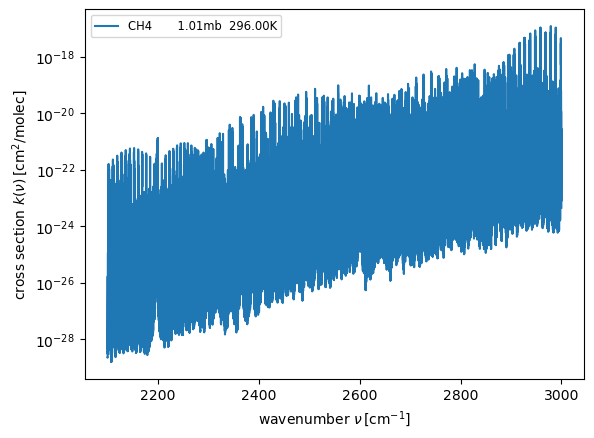

In [17]:
vLimits = (2100.0, 3000.0)

# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll['CH4'],  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

 lbl2xs:  O3        48.00amu  pressure [g/cm/s**2] 1.01325e+06 ---> 1013.25
                              temperature      [K]      296.0  ---> 296.0
 mean p-induced line shift  -0.000001 for p/pRef 0.001

 voigt line parameters at       1.01mb and    296.00K
 position         2000.001500 <=  v <=  2999.999692
 strength               4e-28 <=  S <=     3.75e-21
 Lorentz width              0 <=  L <=     9.26e-05
 Gauss width          0.00178 <=  D <=      0.00267
 cross section  O3       120872 lines   1.01325mb  296.0K  12.5 lbl_2grids_chi Interval [2100,3000] 10.0 8 25.0 True 12.5

 lbl_2grids_chi:    vGrid 4024425 0.00022363448781738702   w 503054 0.0017890759025390962
 v:    4024424  2100.000000 2100.000224 2100.000447 2100.000671 2100.000895  ...  2999.999105 2999.999329 2999.999553 2999.999776 3000.000000
 w:     503053  2100.000000 2100.001789 2100.003578 2100.005367 2100.007156  ...  2999.992844 2999.994633 2999.996422 2999.998211 3000.000000
    4024425    89.81sec     0.18ns:

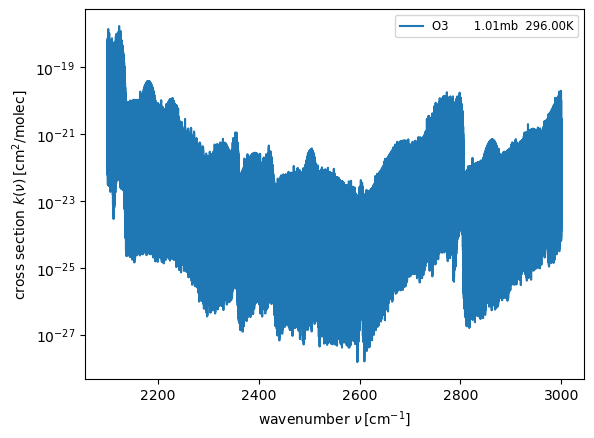

In [74]:

vLimits = (2100.0, 3000.0)
# Asegúrate de que las variables line_data (o dll), lineShape, sampling, nGrids, gridRatio, nWidths, lagrange y verbose estén definidas
xs = lbl2xs(
    dll['O3'],  # o line_data, según lo que estés usando
    pressure=pressure_fixed,
    temperature=temperature_fixed,
    xLimits=vLimits,
    lineShape=line_shape,
    sampling=sampling,
    nGrids=n_grids,
    gridRatio=grid_ratio,
    nWidths=n_widths,
    lagrange=lagrange,
    verbose=verbose,
)

xsPlot(xs)

## ***Optical Depth***

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 960 lines of ['CO']

 lbl2xs:  CO        28.01amu 960 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  CO         960 lines      1013mb  294.2K  10.0       27873     0.14sec     5.08ns:  1.8055e-32 < xs < 2.32329e-18
 cross section  CO         960 lines       902mb  289.7K  10.0       30945     0.08sec     2.85ns:  1.06195e-32 < xs < 2.61436e-18
 cross section  CO         960 lines       802mb  285.2K  10.0       34401     0.12sec     3.58ns:  6.15942e-33 < xs < 2.92824e-18
 cross section  CO         960 lines       710mb  279.2K  10.0       38249     0.15sec     4.14ns:  3.02747e-33 < xs < 3.26267e-18
 cross section  CO         960 lines       628mb  273.2K  10.0       42545     0.17sec     4.28ns:  1.4512e-33 < xs < 3.68172e-18
 cross section  CO         960 lines       554mb  267.2K  10.0       47425     0.14sec     3.11ns:  6.7641e-34 < xs < 4.13695e-18
 cross section  C

/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


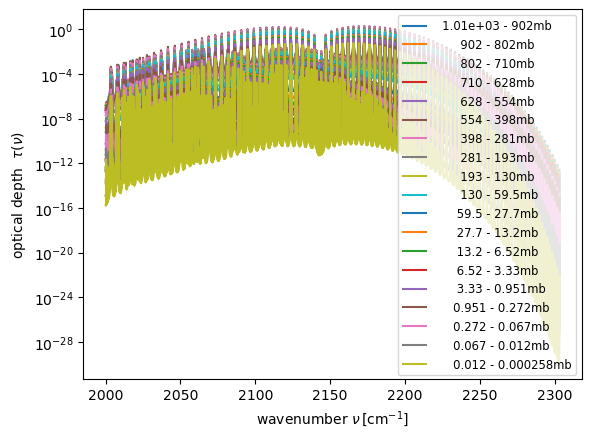

In [ ]:
from py4cats import lbl2od, odPlot
dodl = lbl2od(mls, dll['CO'])
odPlot(dodl)

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 960 lines of ['CO']

 lbl2xs:  CO        28.01amu 960 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  CO         960 lines      1013mb  294.2K  10.0        4425     0.04sec     8.45ns:  6.03653e-22 < xs < 1.9509e-18
 cross section  CO         960 lines       902mb  289.7K  10.0        4913     0.05sec    10.43ns:  5.4846e-22 < xs < 2.17907e-18
 cross section  CO         960 lines       802mb  285.2K  10.0        5465     0.04sec     7.25ns:  4.97917e-22 < xs < 2.4286e-18
 cross section  CO         960 lines       710mb  279.2K  10.0        6081     0.03sec     5.00ns:  4.53436e-22 < xs < 2.73377e-18
 cross section  CO         960 lines       628mb  273.2K  10.0        6761     0.03sec     4.73ns:  4.13065e-22 < xs < 3.06546e-18
 cross section  CO         960 lines       554mb  267.2K  10.0        7537     0.04sec     5.96ns:  3.75752e-22 < xs < 3.44456e-18
 cross section  C

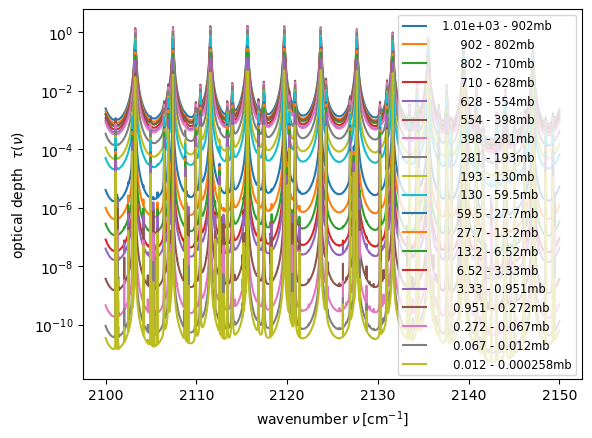

In [13]:
vLimits = (2100.0, 2150.0)
dodl = lbl2od(mls, dll['CO'], vLimits)
odPlot(dodl)


## ***Radiance***

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 370725 lines of ['O3', 'CO', 'CH4', 'CO2', 'H2O', 'N2O']

 lbl2xs:  O3        48.00amu 120872 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  O3       120872 lines      1013mb  294.2K  10.0         897     0.90sec     8.31ns:  1.21341e-20 < xs < 3.97177e-20
 cross section  O3       120872 lines       902mb  289.7K  10.0         993     0.56sec     4.70ns:  1.14509e-20 < xs < 4.24322e-20
 cross section  O3       120872 lines       802mb  285.2K  10.0        1105     0.60sec     4.50ns:  1.07557e-20 < xs < 4.55143e-20
 cross section  O3       120872 lines       710mb  279.2K  10.0        1225     0.57sec     3.86ns:  1.00623e-20 < xs < 4.92041e-20
 cross section  O3       120872 lines       628mb  273.2K  10.0        1369     0.59sec     3.55ns:  9.36838e-21 < xs < 5.38855e-20
 cross section  O3       120872 lines       554mb  267.2K  10.0        1521     0.65sec     3.53ns: 

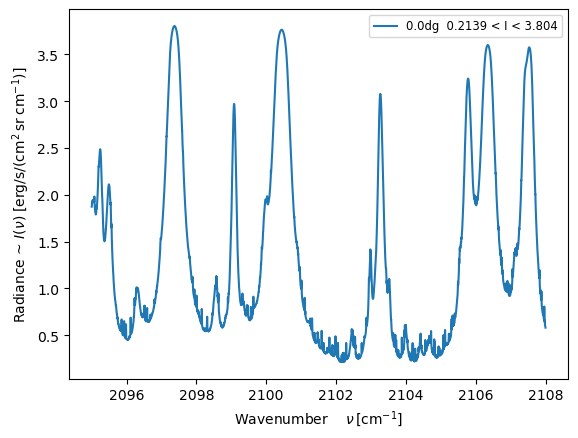

In [19]:
# Define el rango base (por ejemplo, 2100 a 2150 cm⁻¹)
vLimits = (2100.0, 2103.0)

# Para extender el rango en 5 cm⁻¹ en cada extremo:
extended_vLimits = (vLimits[0] - 5, vLimits[1] + 5)

# Ahora, asumiendo que mls es un diccionario con la clave 'T' y dll es tu objeto de líneas
dodl = lbl2od(mls, dll, extended_vLimits)
radUp = dod2ri(dodl)  # downwelling radiation seen by an uplooking observer
radDown = dod2ri(dodl, 180.)  # upwelling radiation seen by a nadir viewer
radNadir = dod2ri(dodl, 180., mls['T'][0])  # forgot surface emission, assume T_surface=T_BoA=mls['T'][0]=mls[0]['T']
#Adding Planck BB background for  294.2K   ===>   3.21273 <= B <= 3.82278

riPlot(radUp)

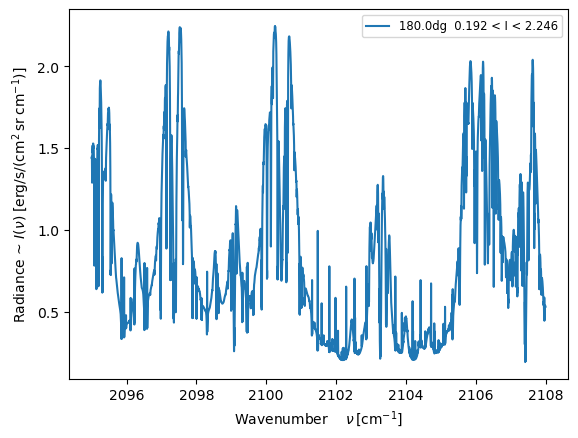

In [20]:
riPlot(radDown)

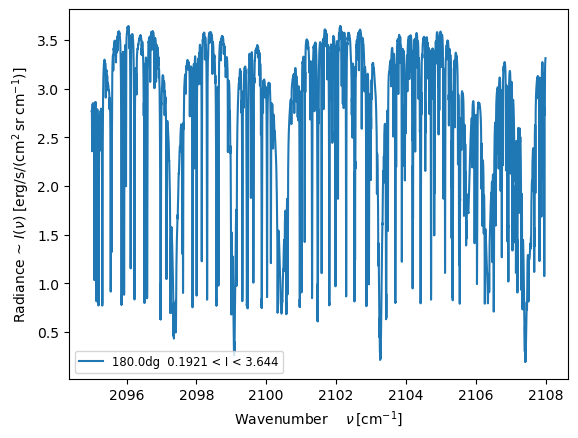

In [21]:
riPlot(radNadir)

 lbl2od:   20 levels atmosphere  H2O CO2 O3 N2O CO CH4 N2 O2 and 960 lines of ['CO']

 lbl2xs:  CO        28.01amu 960 lines @ reference p [g/cm/s**2]  1.013e+06      T [K] 296.00  ---> 20 p,T pairs 
 cross section  CO         960 lines      1013mb  294.2K  10.0       30609     0.14sec     4.78ns:         0 < xs < 2.33517e-18
 cross section  CO         960 lines       902mb  289.7K  10.0       33985     0.13sec     3.89ns:         0 < xs < 2.61555e-18
 cross section  CO         960 lines       802mb  285.2K  10.0       37785     0.14sec     3.81ns:         0 < xs < 2.92129e-18
 cross section  CO         960 lines       710mb  279.2K  10.0       42017     0.16sec     4.00ns:         0 < xs < 3.28273e-18
 cross section  CO         960 lines       628mb  273.2K  10.0       46737     0.12sec     2.65ns:         0 < xs < 3.68232e-18
 cross section  CO         960 lines       554mb  267.2K  10.0       52105     0.09sec     1.71ns:         0 < xs < 4.13947e-18
 cross section  CO         960 l

/home/julianleon/.conda/envs/py4cats_fix/lib/python3.10/site-packages/py4cats/var/moreFun.py:91: RuntimeWarning: invalid value encountered in divide
  (one-np.exp(-ax))/ax )


 dod2ri:  Schwarzschild plane-parallel  ===>           -2.49e-16 <= I <=    2.96771   with   3.14e-06 <= T <= 1.000000  (and  803049 points)
 dod2ri:  Schwarzschild plane-parallel  ===>           -1.11e-15 <= I <=    1.23463   with   3.14e-06 <= T <= 1.000000  (and  803049 points)
 dod2ri:  Schwarzschild plane-parallel  ===>               0.112 <= I <=    3.86593   with   3.14e-06 <= T <= 1.000000  (and  803049 points)


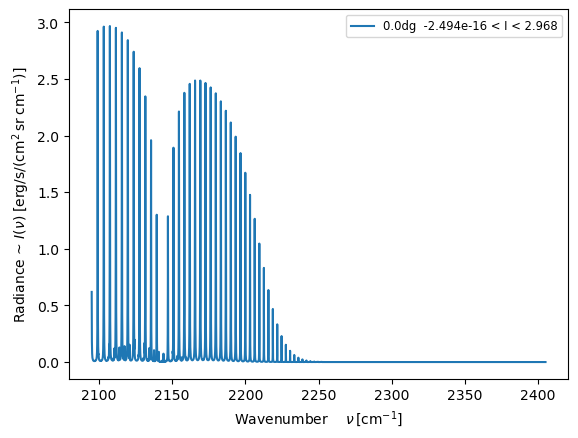

In [28]:
# Define el rango base (por ejemplo, 2100 a 2150 cm⁻¹)
vLimits = (2100.0, 2400.0)

# Para extender el rango en 5 cm⁻¹ en cada extremo:
extended_vLimits = (vLimits[0] - 5, vLimits[1] + 5)

# Ahora, asumiendo que mls es un diccionario con la clave 'T' y dll es tu objeto de líneas
dodl = lbl2od(mls, dll['CO'], extended_vLimits)
radUp = dod2ri(dodl)  # downwelling radiation seen by an uplooking observer
radDown = dod2ri(dodl, 180.)  # upwelling radiation seen by a nadir viewer
radNadir = dod2ri(dodl, 180., mls['T'][0])  # forgot surface emission, assume T_surface=T_BoA=mls['T'][0]=mls[0]['T']
#Adding Planck BB background for  294.2K   ===>   3.21273 <= B <= 3.82278

riPlot(radUp)

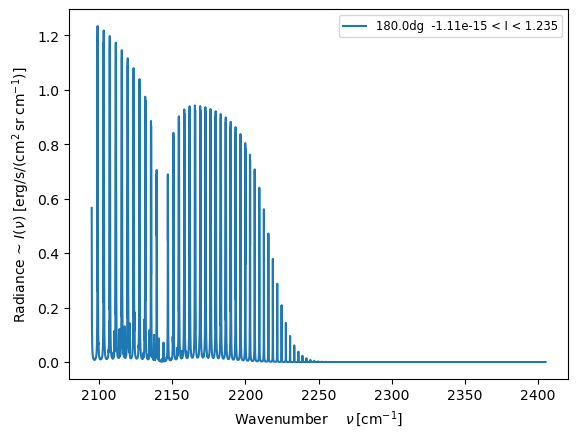

In [29]:
riPlot(radDown)

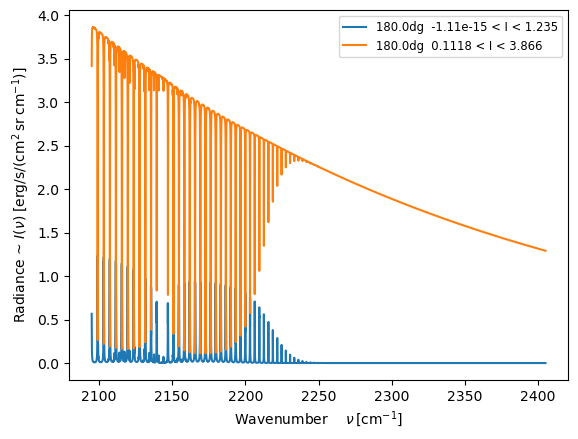

In [31]:
riPlot([radDown,radNadir])